# External modules

In [4]:
library(tidyverse)
library(readr)
library(DescTools)
library(quantmod)

# Internal functions

In [5]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima_with_indexes.R"))

xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_ns_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_ns_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_normalized_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/get_several_ns_gev_model_normalized_parameters.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_non_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_non_stationary_gev_mixture_model_quantile.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_estimate_non_stationary_gev_mixture_model_quantile.R"))


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:DescTools’:

    MAE, RMSE


The following object is masked from ‘package:purrr’:

    lift




In [6]:
options(repr.plot.width=19, repr.plot.height=12)

# Data

In [7]:
# Define the tickers
tickers <- c("FR.PA")

# Download stock data
stock <- getSymbols(tickers, src = 'yahoo', from = '2001-01-01', to = Sys.Date(), auto.assign = FALSE)


Warning message:
“FR.PA contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


In [8]:
# save stock data
write.csv(x = stock, file = "./FR.PA.csv", row.names = FALSE)

In [10]:
data <- xfun::in_dir(dir = path, expr = read.csv(file = "./03_application_stock_valeo/FR.PA.csv", sep = ","))

In [11]:
str(data)

'data.frame':	5921 obs. of  6 variables:
 $ FR.PA.Open    : num  15.9 15.7 15.8 16.3 16.4 ...
 $ FR.PA.High    : num  16.2 15.8 16 16.6 16.4 ...
 $ FR.PA.Low     : num  15.5 14.4 15.1 15.7 16 ...
 $ FR.PA.Close   : num  15.7 15 15.3 16.4 16.1 ...
 $ FR.PA.Volume  : int  444738 1635465 1876821 2233056 2394804 1452237 2010264 1390356 1612152 417294 ...
 $ FR.PA.Adjusted: num  8.56 8.15 8.35 8.92 8.78 ...


In [12]:
x_raw <- diff(log(data$FR.PA.Close))

# Data description

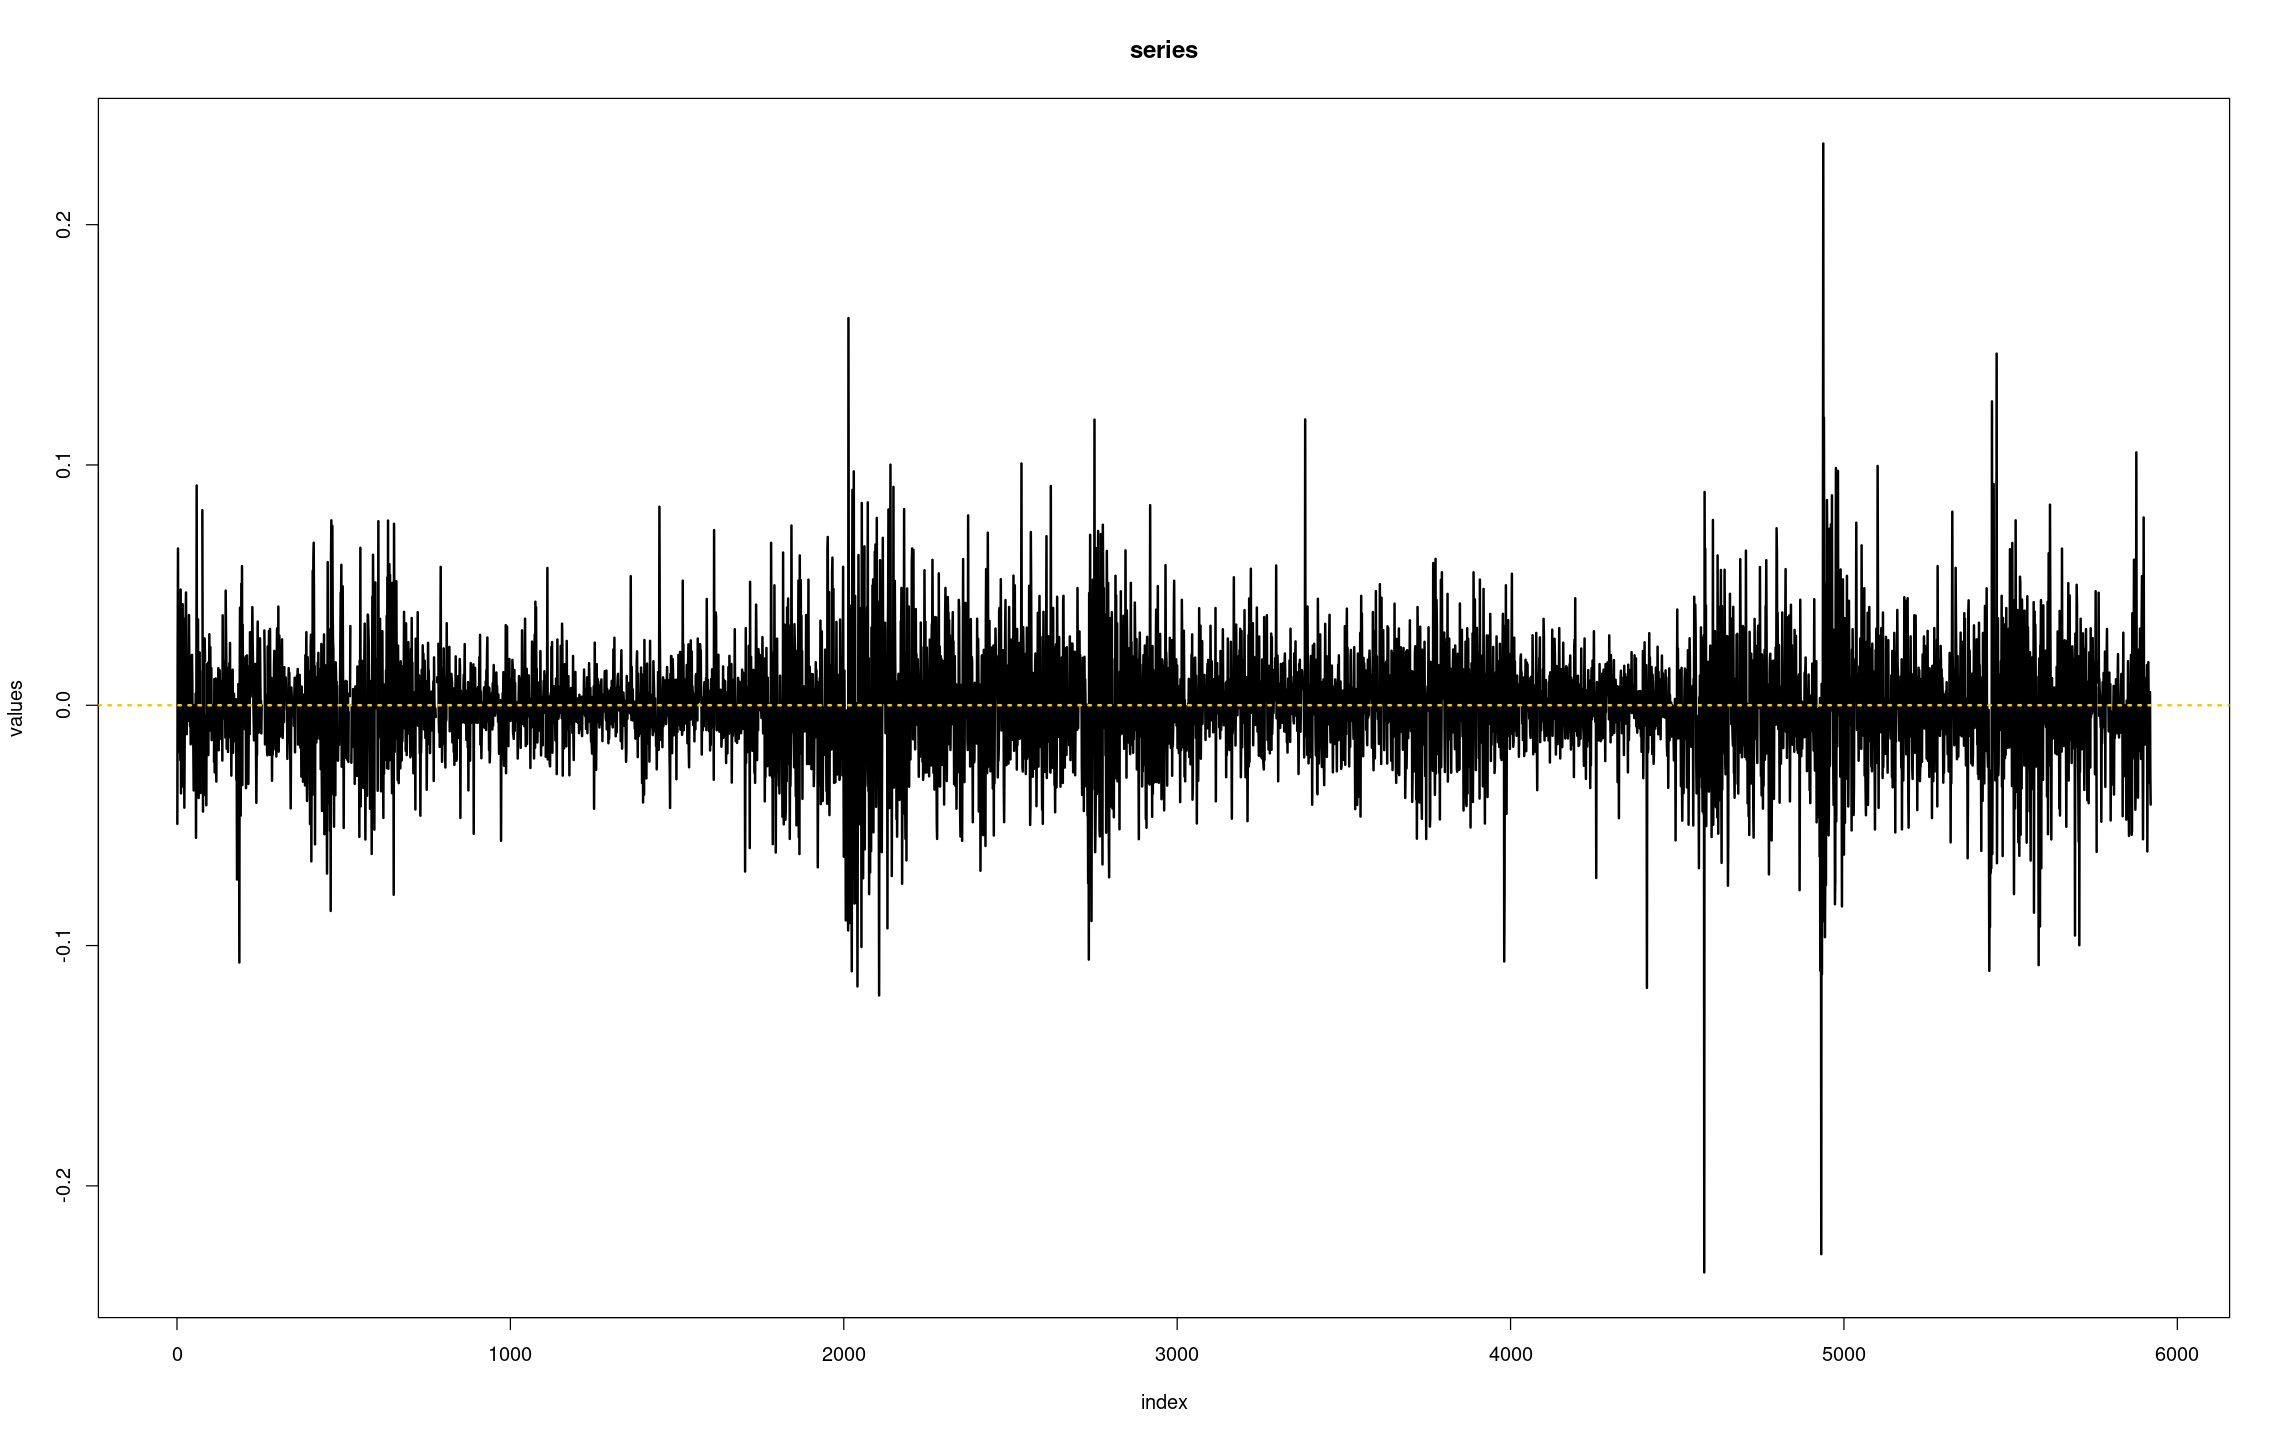

In [13]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x_raw, 
     type = "l", 
     lwd = 2, 
     ylab = "values", 
     xlab = "index",
    main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)


In [14]:
x <- x_raw

------------------------------------------------------------------------------ 
x (numeric)

          length               n               NAs         unique'
           5'920           5'875                45          5'807
                           99.2%              0.8%               
                                                                 
             .05             .10               .25         median
  -0.03931896734  -0.02791438083    -0.01264579515  0.00000000000
                                                                 
           range              sd             vcoef            mad
   0.46978886911   0.02499150679  -376.08761007959  0.01854932422
                                                                 
             0s            mean          meanCI
             55  -0.00006645129  -0.00070563558
           0.9%                   0.00057273300
                                               
            .75             .90             .95
  0.01

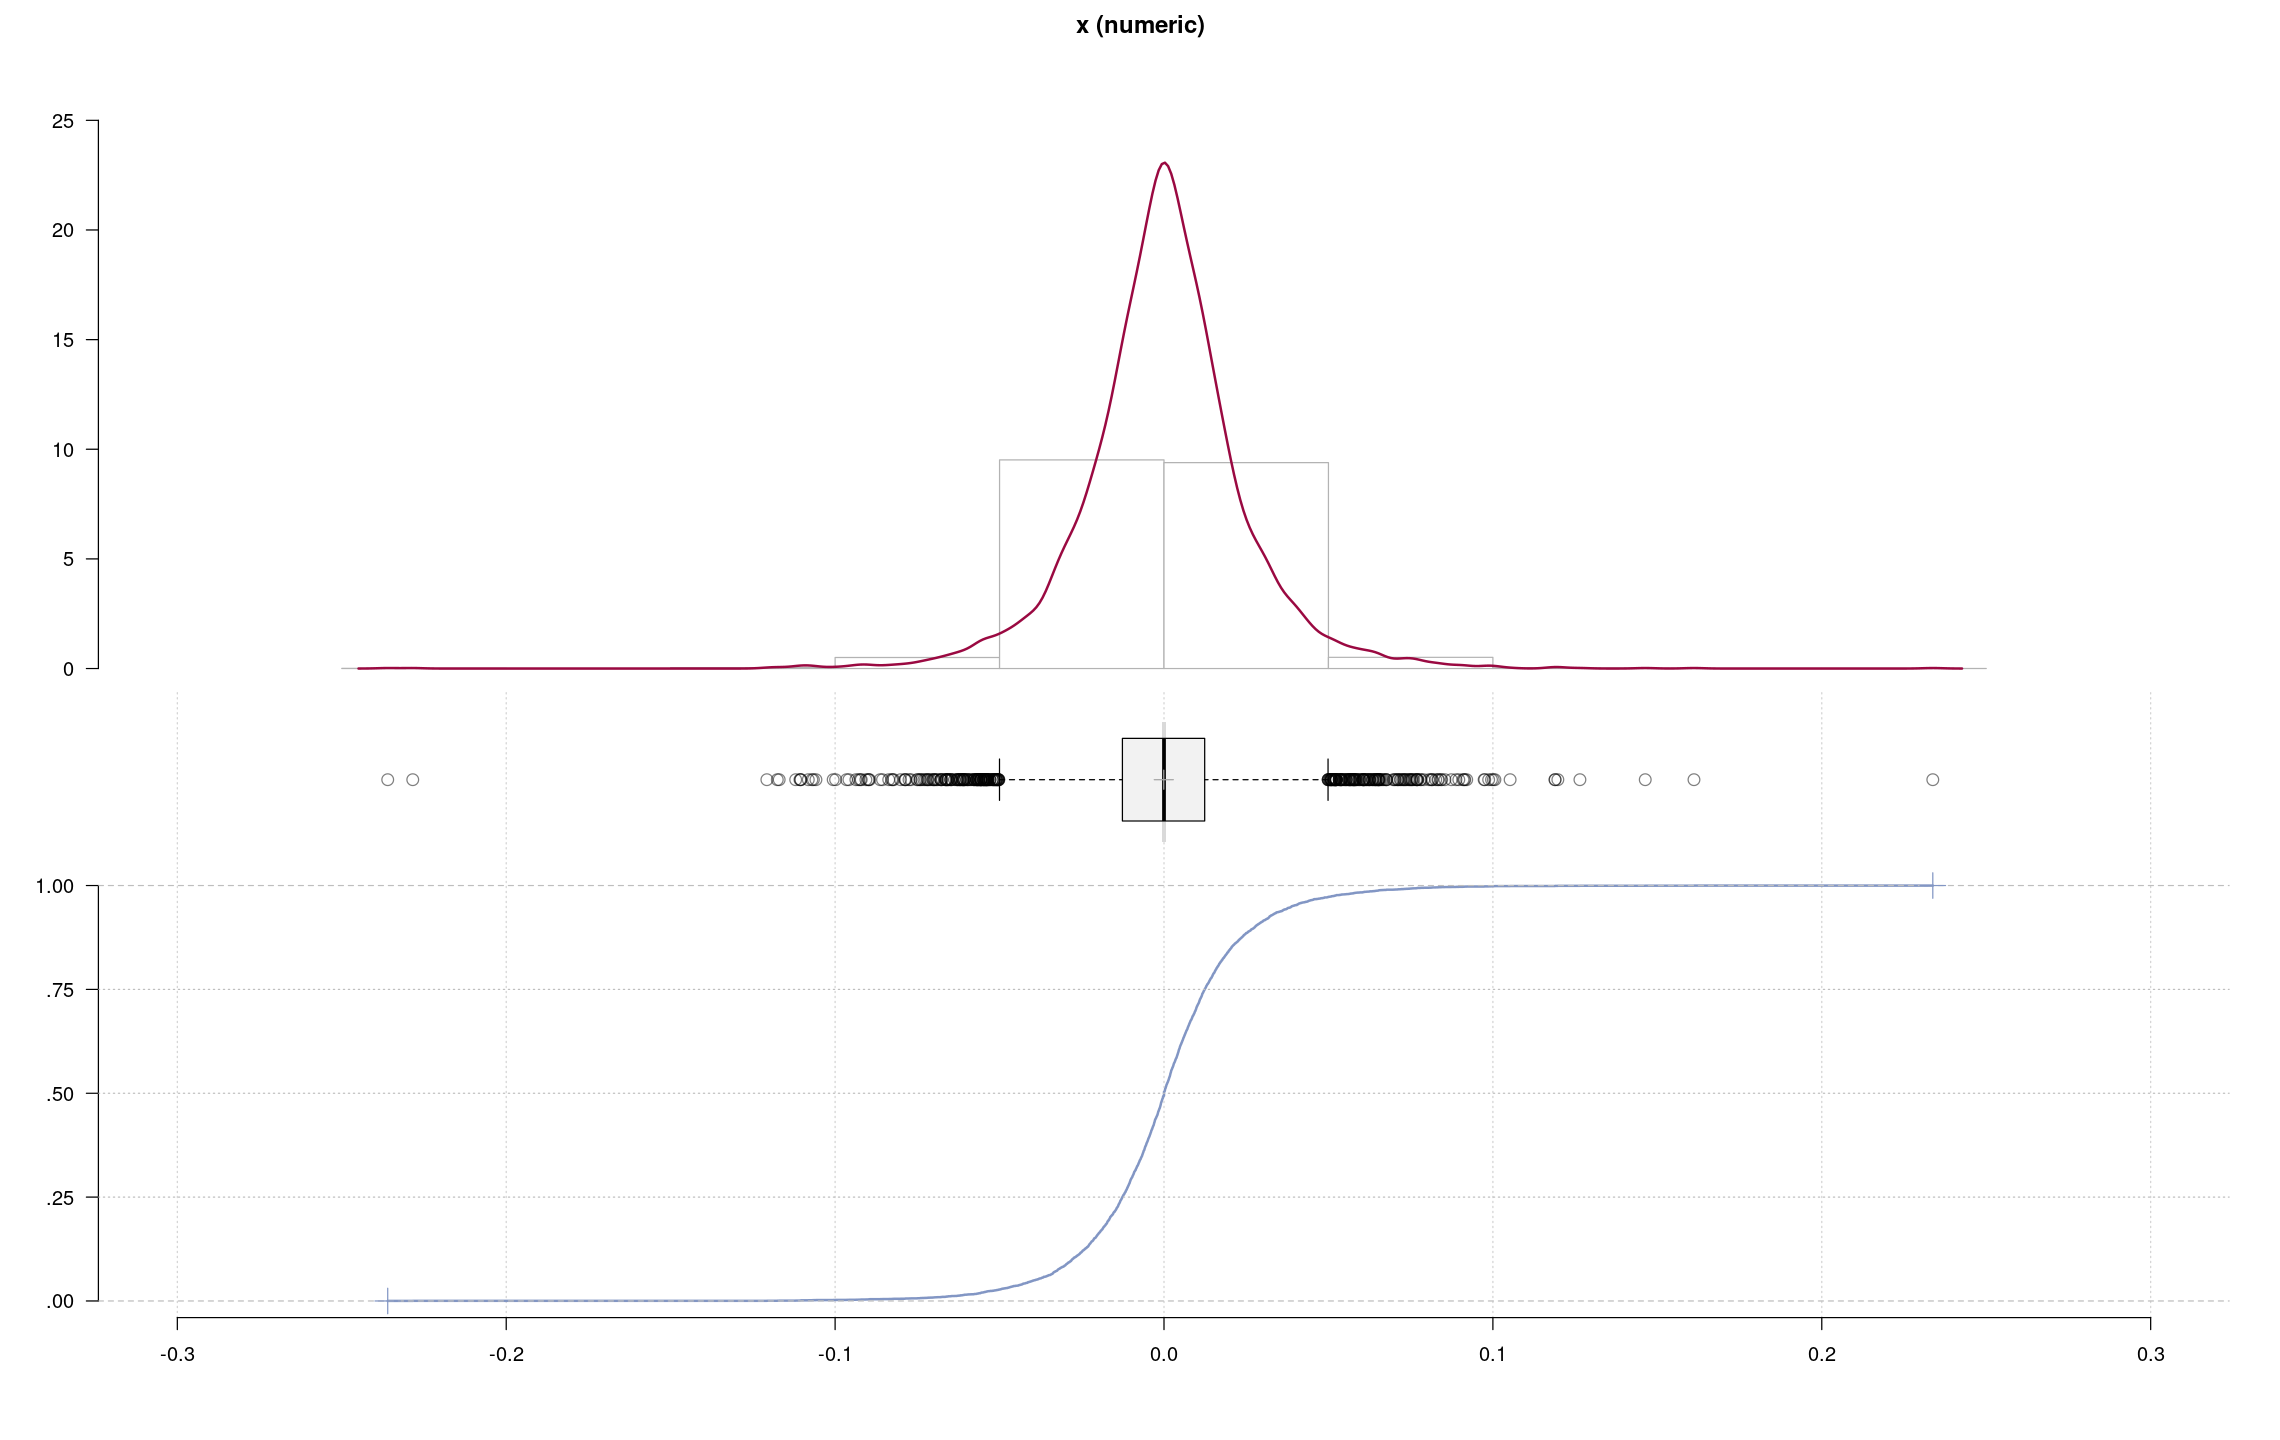

In [15]:
options(repr.plot.width=19, repr.plot.height=12)

Desc(x)

In [16]:
x <- x_raw[!is.na(x_raw)]
n <- length(x)

summary(x)

         Min.       1st Qu.        Median          Mean       3rd Qu. 
-2.360318e-01 -1.264580e-02  0.000000e+00 -6.645129e-05  1.237255e-02 
         Max. 
 2.337571e-01 

In [17]:
# options(repr.plot.width=19, repr.plot.height=12)
# 
# nlargest <- 3000
# y <- extract_nlargest_sample(x, n = nlargest)
# Desc(y)

# EVA: Stationary case

## Estimation

In [18]:
minimum_block_size <- find_minimum_block_size(x, threshold = min(x))

print(minimum_block_size)

[1] 3


In [19]:
maximum_block_size <- find_block_size_associated_with_given_number_of_blocks(x, m = 50)

print(maximum_block_size)

[1] 117


In [20]:
maxima <- extract_block_maxima(x, block_size = minimum_block_size)

print(min(maxima))

[1] -0.06624288445


In [21]:
print(median(x))

[1] 0


In [22]:
print(calculate_mode(x))

[1] 0.0002938715649


In [23]:
candidate_block_sizes <- get_candidate_block_sizes(x, threshold = min(x), m = 50)

print(candidate_block_sizes)

  [1]   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
 [19]  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
 [37]  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
 [55]  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
 [73]  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
 [91]  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
[109] 111 112 113 114 115 116 117


In [24]:
gev_mixture_model_object <- fit_stationary_gev_mixture_model(x = x,
                                                             nlargest = Inf,
                                                             block_sizes = NULL,
                                                             minimum_nblocks = 50,
                                                             threshold = min(x),
                                                             confidence_level = 0.95,
                                                             use_extremal_index = TRUE,
                                                             use_uniform_prior = TRUE,
                                                             method = c("MLE", "GMLE", "Lmoments")[1])

In [25]:
print(names(gev_mixture_model_object))

 [1] "threshold"                            
 [2] "candidate_block_sizes"                
 [3] "equivalent_block_sizes"               
 [4] "unequivalent_block_sizes"             
 [5] "selected_block_sizes"                 
 [6] "unselected_block_sizes"               
 [7] "failed_block_sizes"                   
 [8] "use_uniform_prior"                    
 [9] "weights"                              
[10] "frequencies"                          
[11] "use_extremal_index"                   
[12] "extremal_indexes"                     
[13] "negative_log_likelihoods"             
[14] "information_criteria"                 
[15] "unnormalized_gev_parameters_object"   
[16] "normalized_gev_parameters_object"     
[17] "full_normalized_gev_parameters_object"
[18] "partial_data"                         
[19] "all_data"                             
[20] "selected_model_per_obs"               
[21] "selected_gev_models"                  
[22] "several_residuals"                    
[23] "seve

In [26]:
print(gev_mixture_model_object$full_normalized_gev_parameters_object)

            loc_star     scale_star     shape_star
6    0.0072637470075 0.017218878807 -0.01581070653
11   0.0021428801474 0.019688853170 -0.03432133311
22  -0.0110121795134 0.024953152363 -0.05812839105
33  -0.0242201738198 0.029594432526 -0.07209810045
47  -0.0014533906407 0.009306440129  0.18442758452
53   0.0009927636373 0.008207786034  0.21892513668
66  -0.0615469439389 0.041695506434 -0.09844365656
74  -0.0034165780092 0.009661680947  0.17518578249
83  -0.0058538109639 0.009900888535  0.17961597269
89  -0.0828103686591 0.047249171061 -0.10606969264
93  -0.0227458991264 0.014013965810  0.11599073804
100 -0.0119123579635 0.011837724978  0.15072511243
104 -0.0153768616948 0.012600453785  0.13672936322
106 -0.0112529494453 0.011596186185  0.15606526723
108 -0.0100704991284 0.011169780275  0.15527800281
113 -0.0183085533196 0.013400500651  0.12039062811
116 -0.0141849776633 0.012256640694  0.14177435651


In [27]:
print(gev_mixture_model_object$weights)

              6              11              22              33              47 
0.2668187001140 0.0058912960851 0.0032307107564 0.0013302926644 0.0296465222349 
             53              66              74              83              89 
0.3823641201064 0.0009502090460 0.0387685290764 0.0889395667047 0.0001900418092 
             93             100             104             106             108 
0.0281261877613 0.0028506271380 0.0224249334854 0.0148232611174 0.0551121246674 
            113             116 
0.0247054351957 0.0338274420372 


In [28]:
print(which.max(gev_mixture_model_object$weights))

53 
 6 


In [29]:
print(which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 6


In [30]:
print(which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 6


In [31]:
print(which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 10


In [32]:
print(gev_mixture_model_object$information_criteria)

         AIC          BIC 
-13533.96631 -13086.50940 


In [33]:
print(gev_mixture_model_object$threshold)

[1] -0.02725954878


In [34]:
print(gev_mixture_model_object$equivalent_block_sizes)

  [1]   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
 [19]  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
 [37]  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
 [55]  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
 [73]  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
 [91]  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
[109] 112 113 114 115 116 117


## Diagnostic

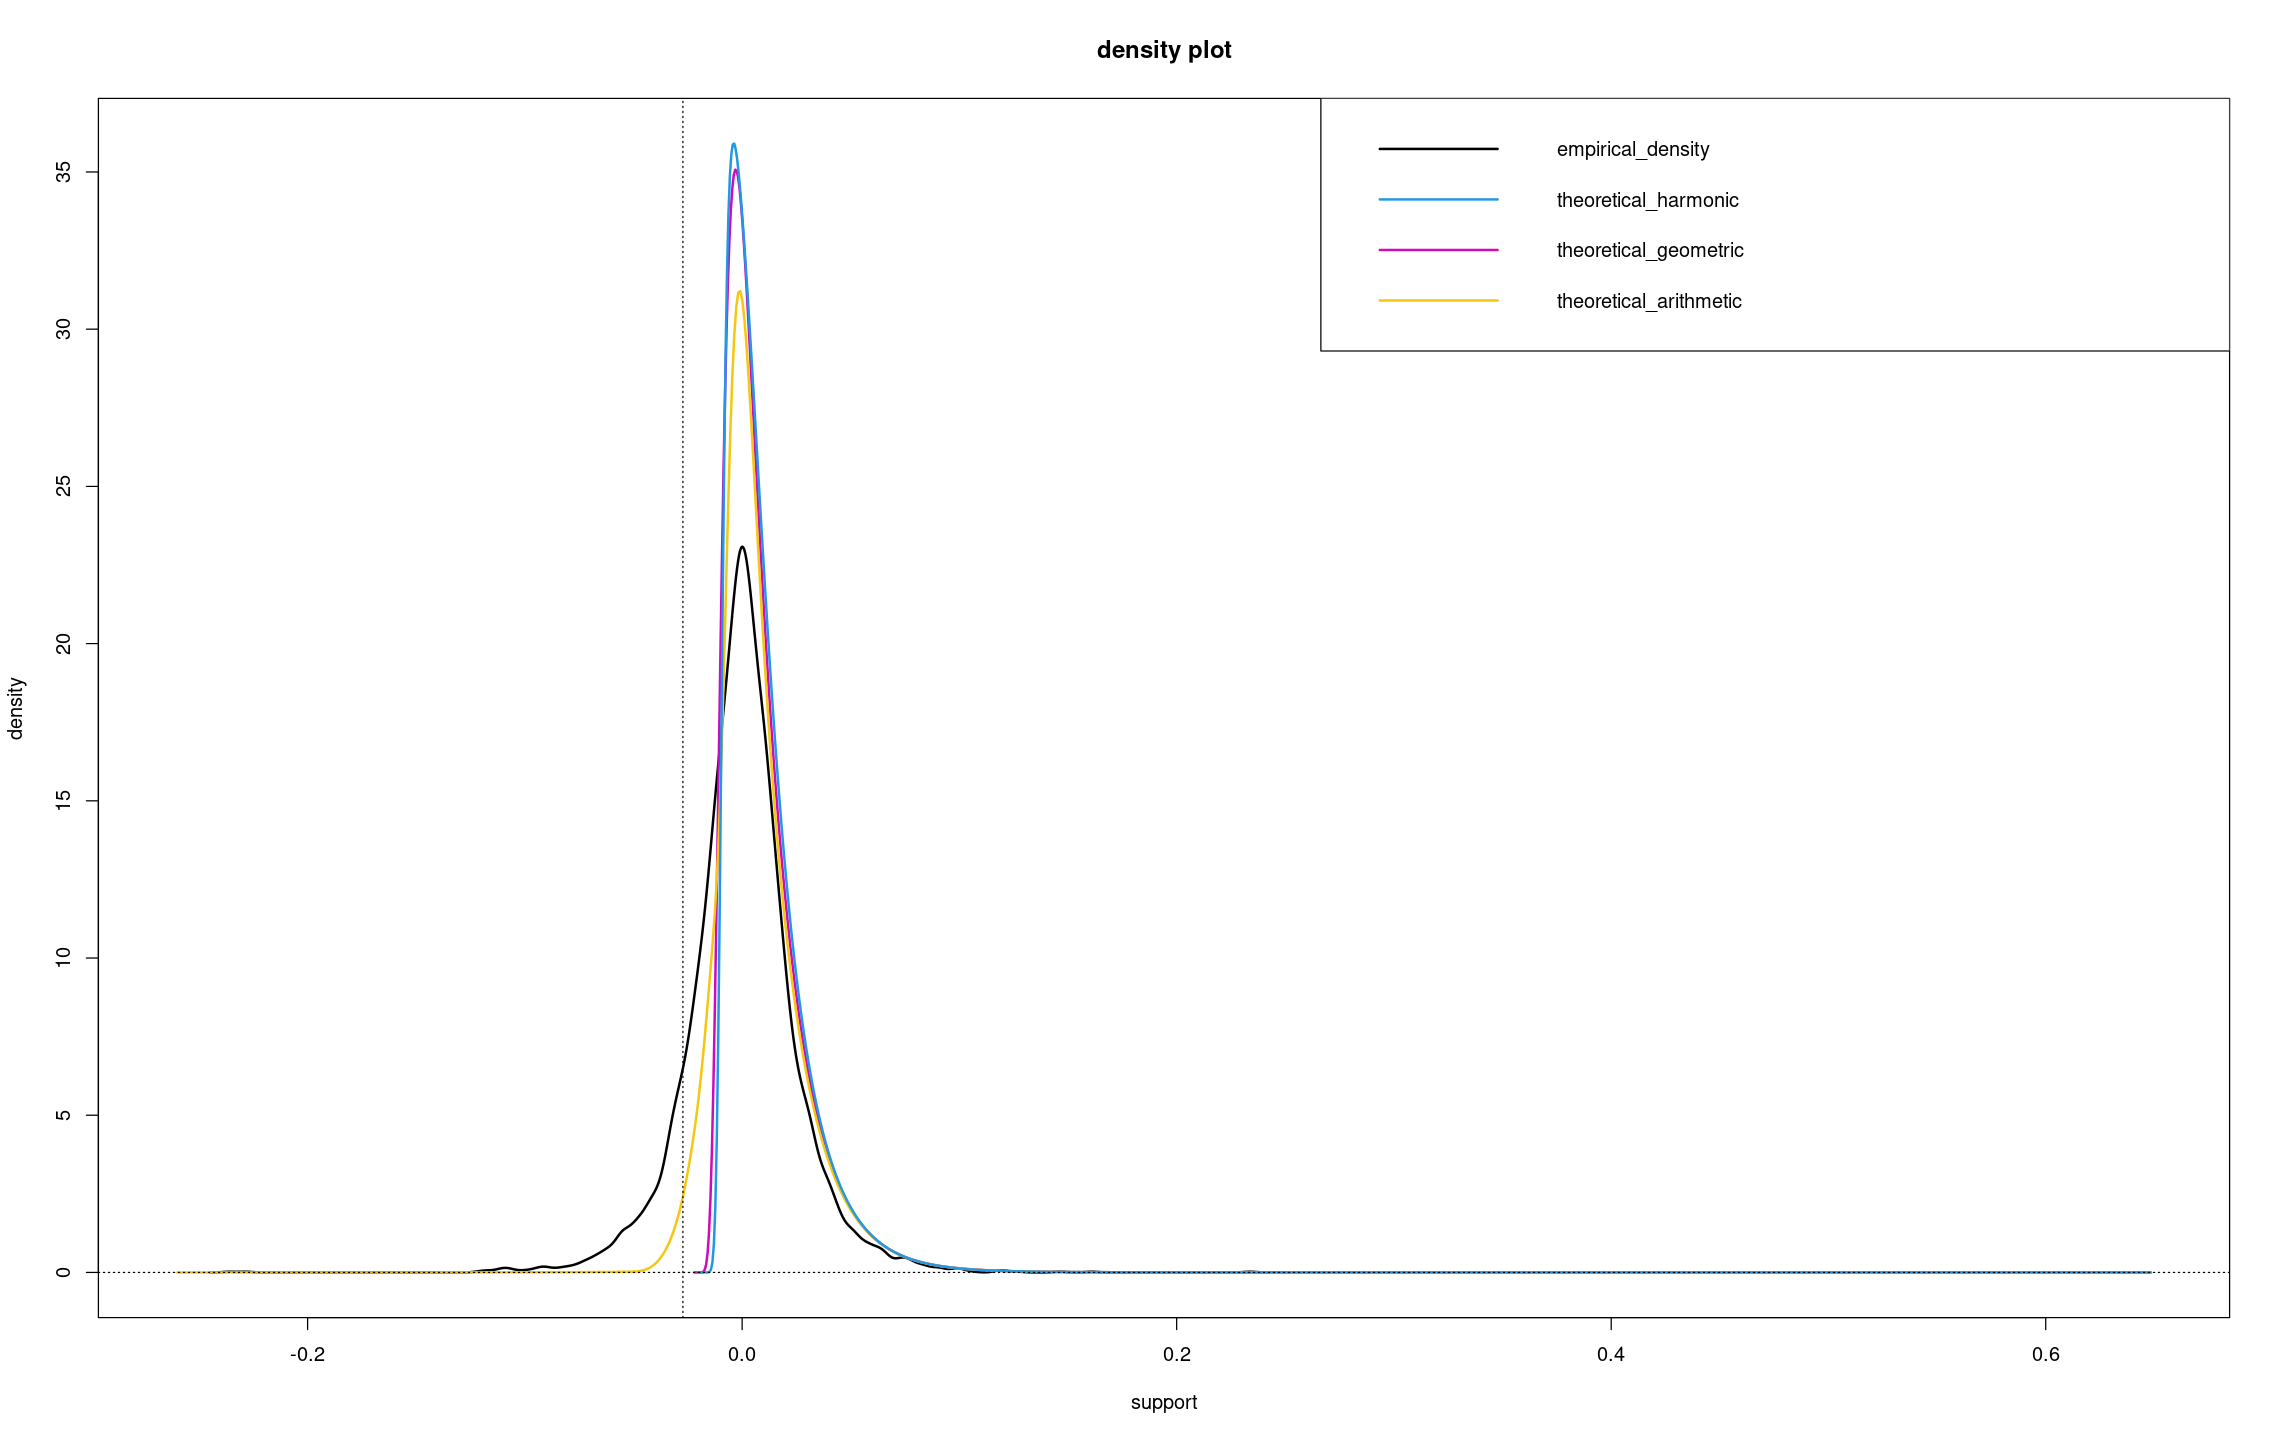

In [35]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = 0,
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

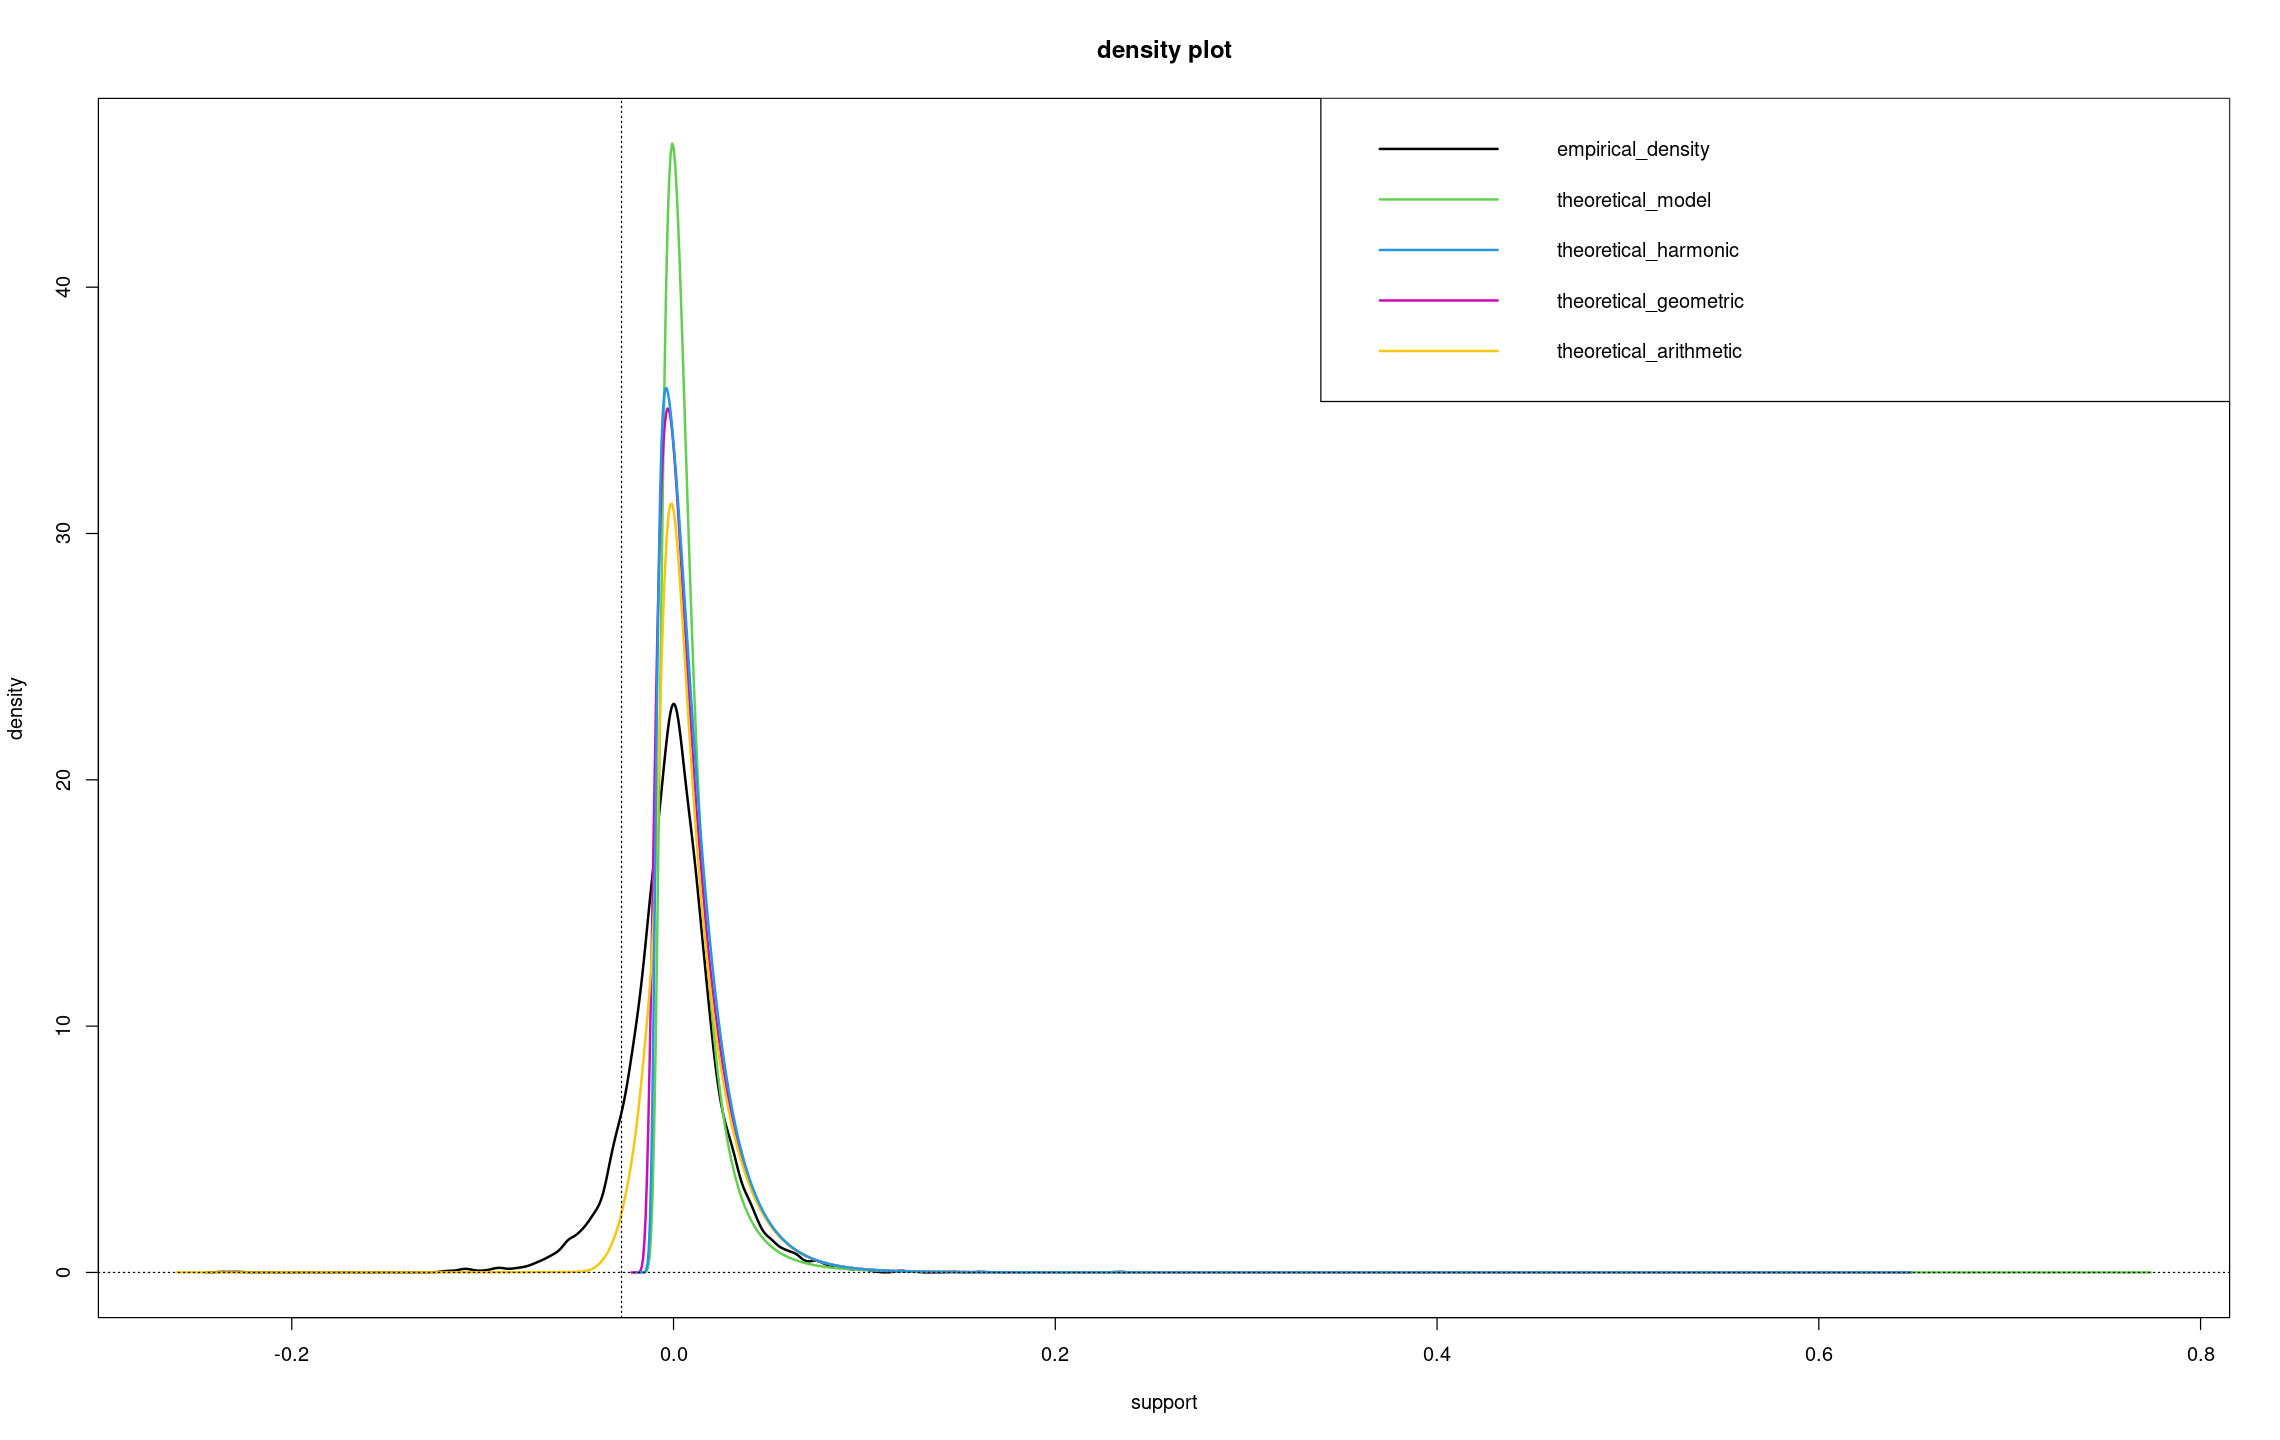

In [36]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$weights),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

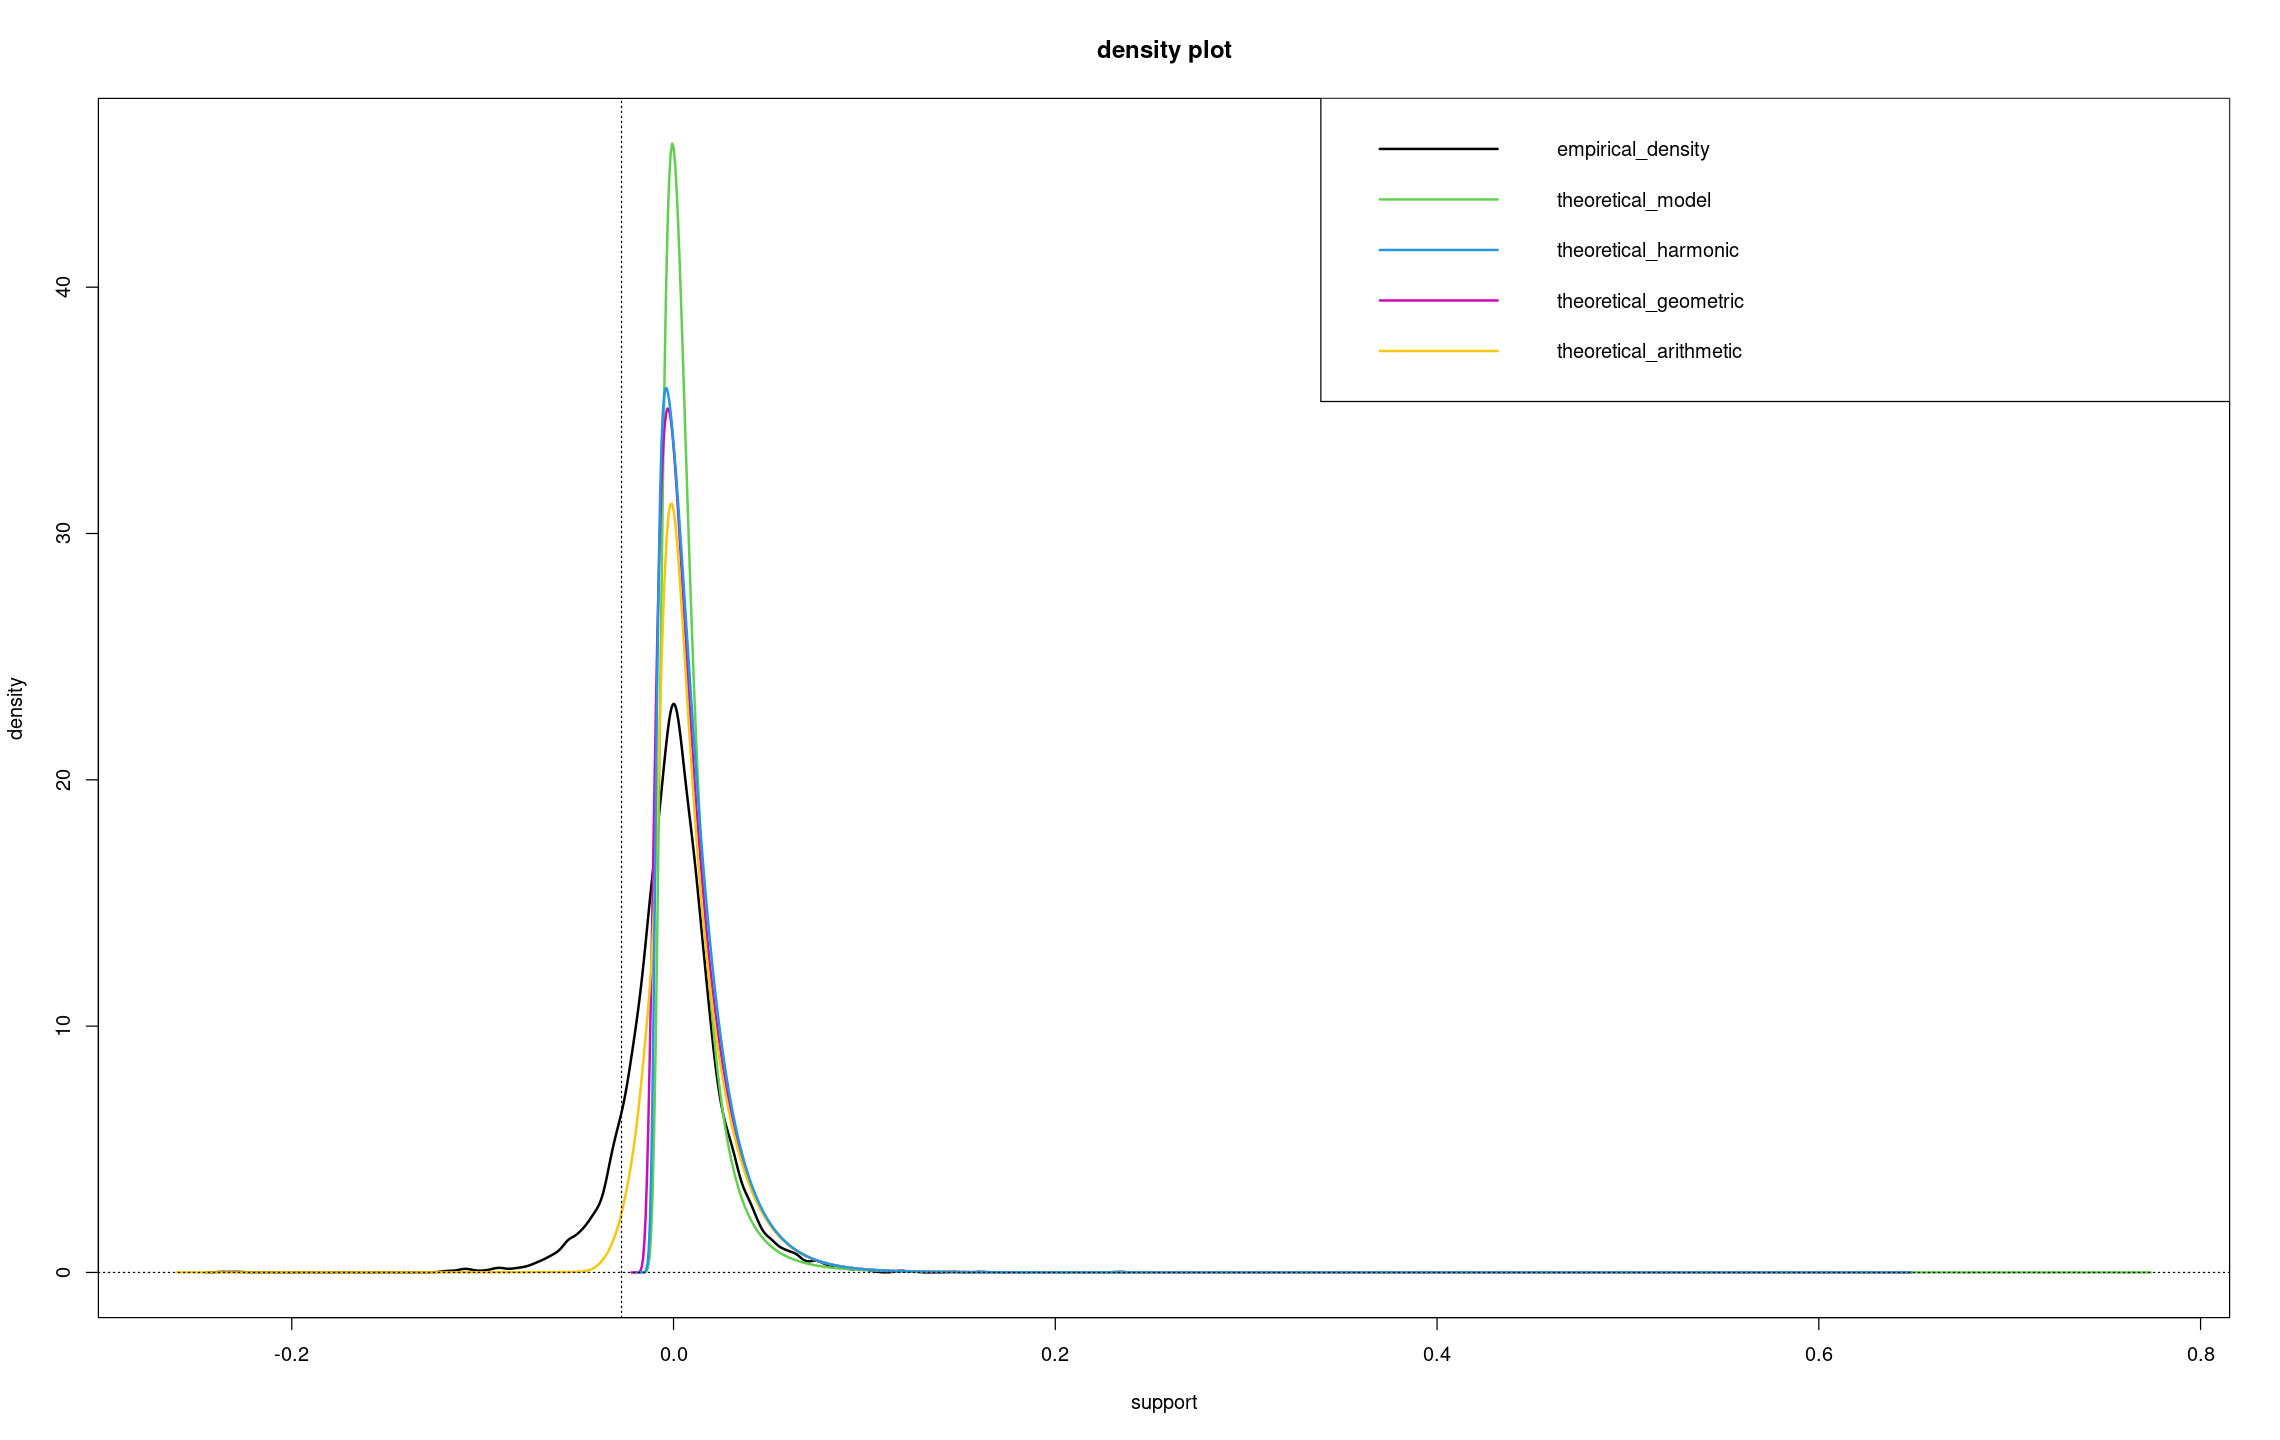

In [37]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

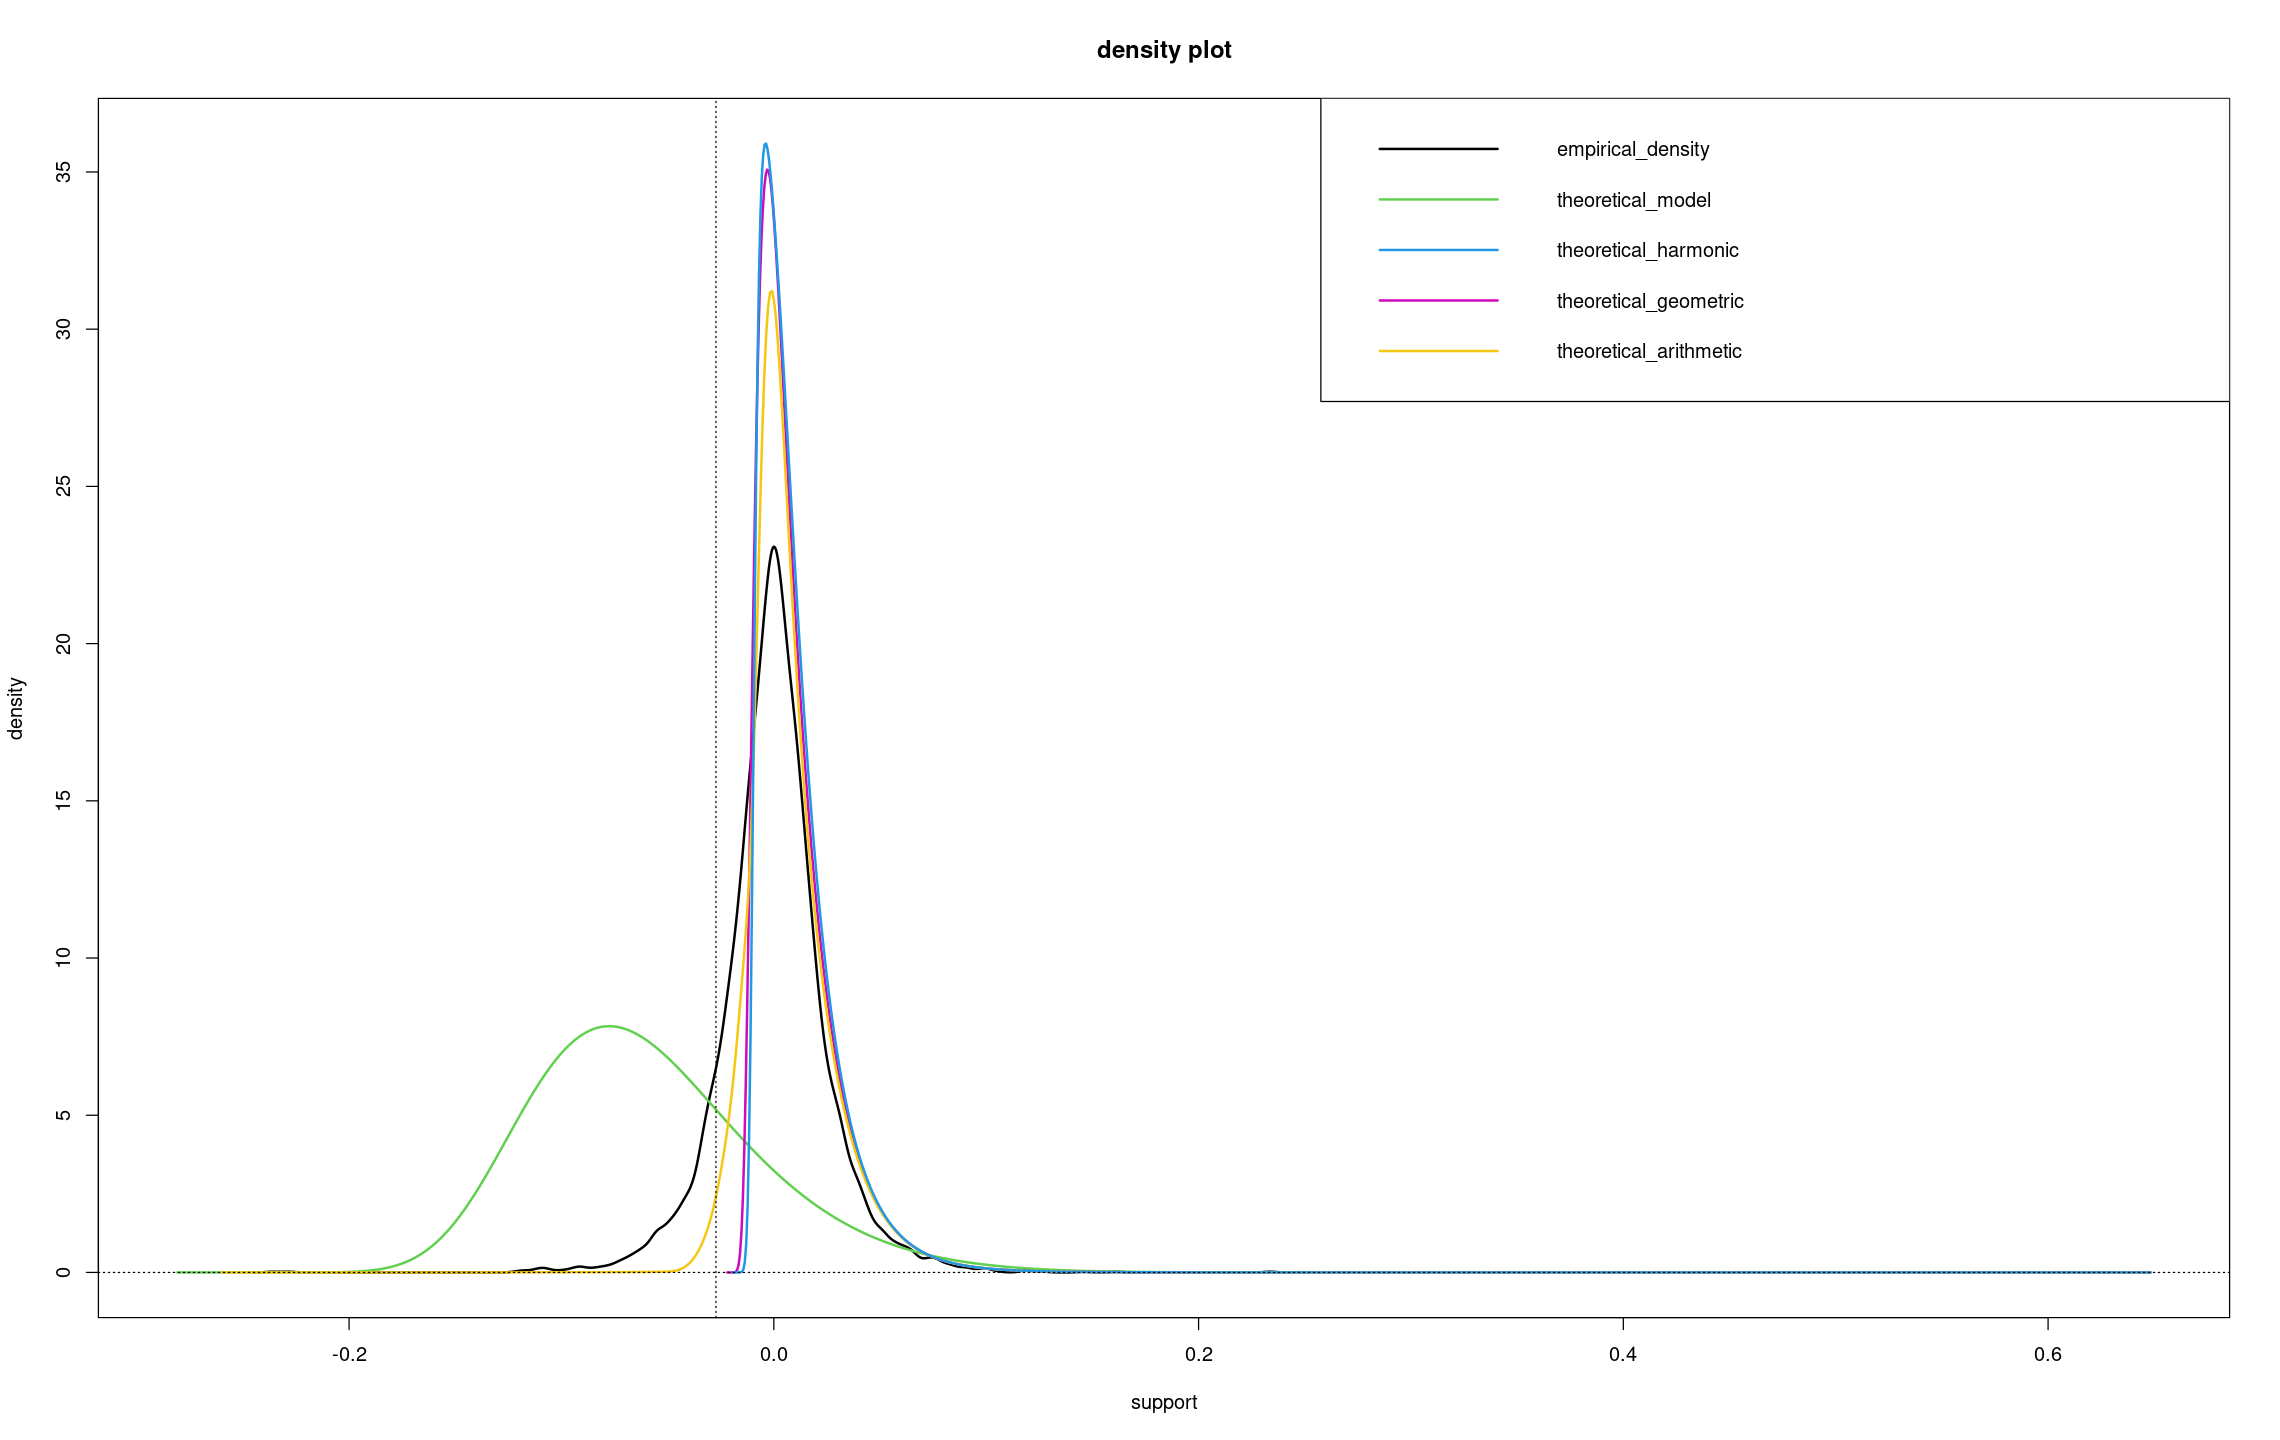

In [38]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

## Quantiles

In [39]:
alpha <- n^(-2)

print(alpha)

[1] 2.897238569e-08


In [40]:
true_quantile <- NULL

print(true_quantile)

NULL


In [41]:
results_geometric <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                    alpha = alpha,
                                                                    do.ci = TRUE,
                                                                    confidence_level = 0.95,
                                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                    iterations = 100)

results_geometric

Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”


,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
6,0.2157684401,0.2688204126,0.3218723851
11,0.2028136879,0.2596182070,0.3164227261
22,0.1932109053,0.2617463269,0.3302817485
33,0.1853487934,0.2688587695,0.3523687455
47,-1.1296454704,1.1873833285,3.5044121275
53,-2.2518936427,1.6392453217,5.5303842862
66,0.1537594143,0.2853029102,0.4168464061
74,-1.4479526605,1.0951731308,3.6382989222
83,-1.8625176482,1.1843250820,4.2311678121


In [42]:
results_arithmetic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                     iterations = 100)

results_arithmetic

Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”


,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
6,0.2157684401,0.2688204126,0.3218723851
11,0.2028136879,0.2596182070,0.3164227261
22,0.1932109053,0.2617463269,0.3302817485
33,0.1853487934,0.2688587695,0.3523687455
47,-1.1296454704,1.1873833285,3.5044121275
53,-2.2518936427,1.6392453217,5.5303842862
66,0.1537594143,0.2853029102,0.4168464061
74,-1.4479526605,1.0951731308,3.6382989222
83,-1.8625176482,1.1843250820,4.2311678121


In [44]:
results_harmonic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                     iterations = 100)

results_harmonic

Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”


,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
6,0.2157684401,0.2688204126,0.3218723851
11,0.2028136879,0.2596182070,0.3164227261
22,0.1932109053,0.2617463269,0.3302817485
33,0.1853487934,0.2688587695,0.3523687455
47,-1.1296454704,1.1873833285,3.5044121275
53,-2.2518936427,1.6392453217,5.5303842862
66,0.1537594143,0.2853029102,0.4168464061
74,-1.4479526605,1.0951731308,3.6382989222
83,-1.8625176482,1.1843250820,4.2311678121


In [45]:
options(repr.plot.width=23, repr.plot.height=6)

Warning message in extRemes::fevd(x = x, type = type, method = method):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”


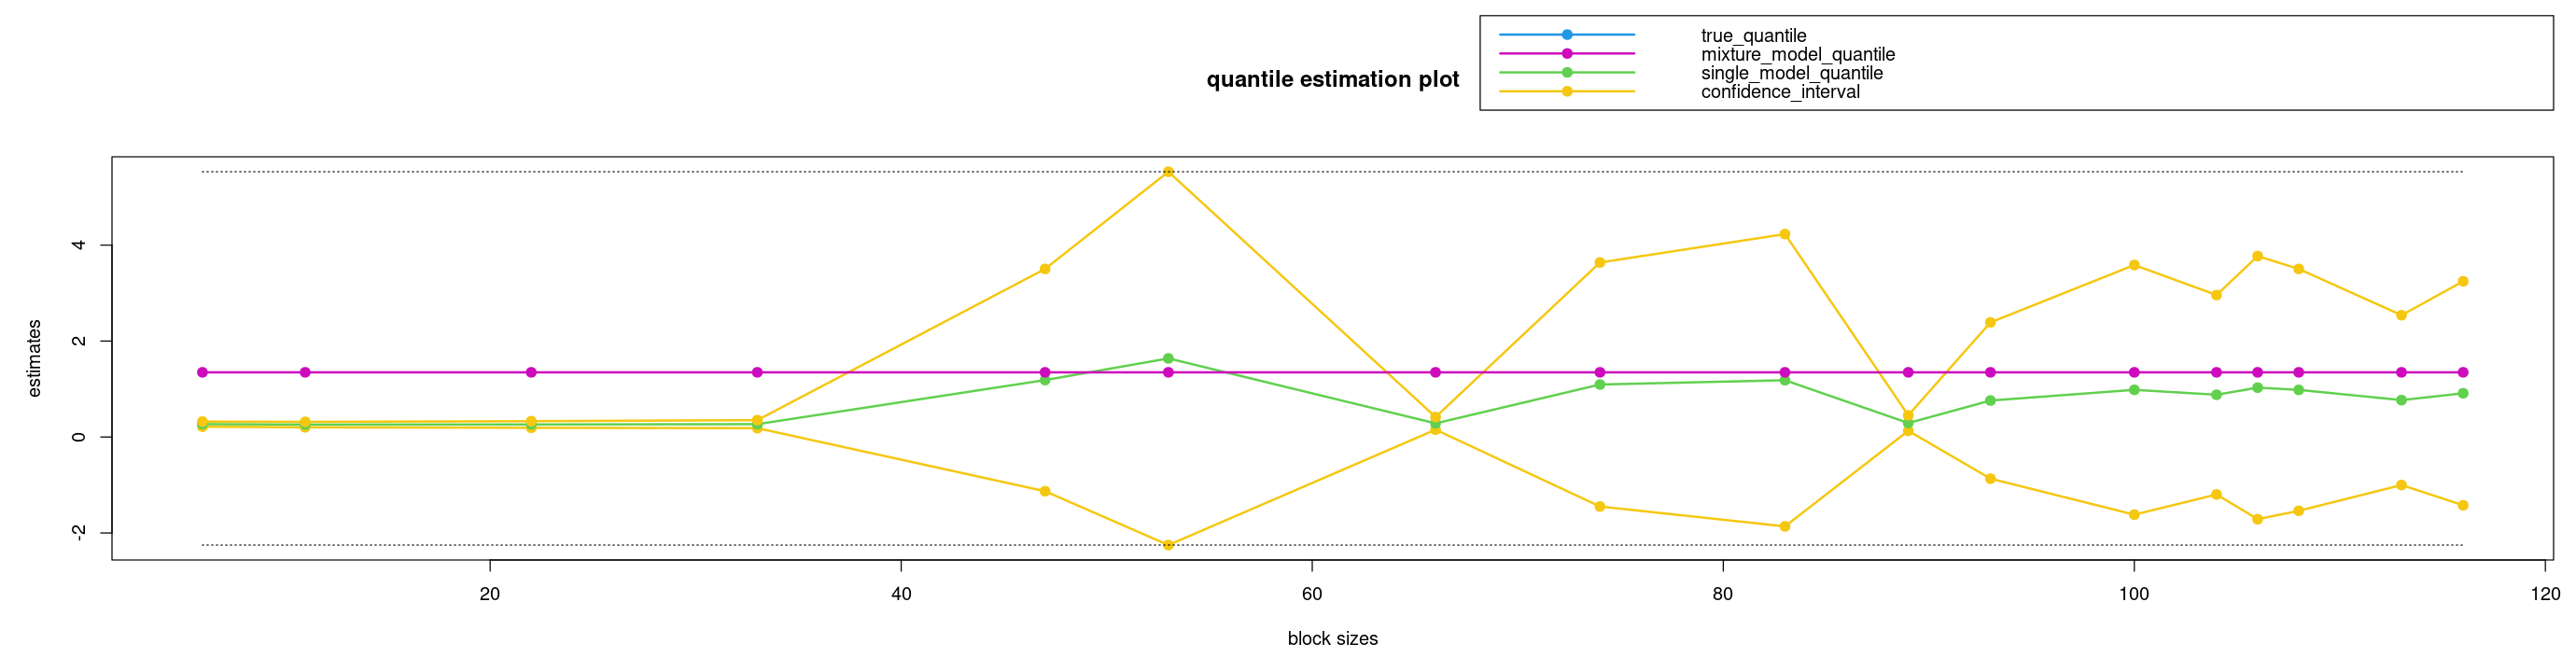

In [46]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                    alpha = alpha,
                                                    true_quantile = NULL,
                                                    do.ci = TRUE,
                                                    confidence_level = 0.95,
                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                    iterations = 100,
                                                    xlab = "block sizes",
                                                    ylab = "estimates",
                                                    main = "quantile estimation plot",
                                                    legend_position = "topright")